## Exploratory data visualization

- How to speed up our exploratory data visualization workflow using Pandas.
- How to better compare graphs using grid charts.

We'll work with a data set about the urban traffic in São Paulo, the most populous city in Brazil. When it comes to traffic congestion, São Paulo is one of the most congested cities in the world.

Traffic jams can be as long as 100 km, and it can take people more than two hours to get to work. The city even has an air-taxi service for those who can afford it.

Traffic jams cause significant loss. Instead of working, people are stuck in traffic wasting fuel, which leads to more air pollution, ultimately impacting human health. According to the World Bank, São Paulo's traffic jams were estimated to cost $17.8 billion dollars in 2012.

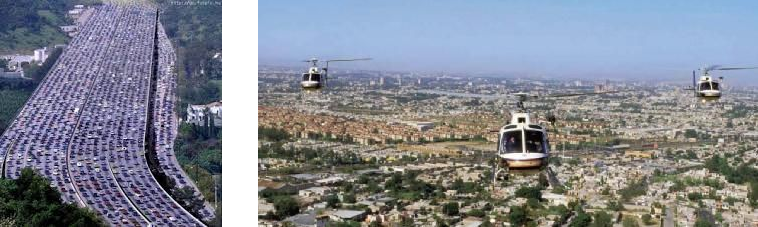

## Traffic behavior dataset

Our dataset describes the urban traffic in the city São Paulo from December 14, 2009 to December 18, 2009 — from Monday to Friday.

Our goal here is to determine the factors that cause the traffic slowness in São Paulo to worsen.

In [1]:
import pandas as pd
traffic = pd.read_csv('/Users/brindhamanivannan/Desktop/data-projects/traffic_sao_paulo.csv', sep=';')
traffic.head()

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"4,1"
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"6,6"
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"8,7"
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"9,2"
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"11,1"


In [2]:
traffic

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"4,1"
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"6,6"
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"8,7"
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"9,2"
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"11,1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,23,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,"17,8"
131,24,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,"18,1"
132,25,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,"17,7"
133,26,0,4,0,0,0,0,0,0,0,0,0,1,0,0,1,0,"17,4"


Each row describes the following:

- The time of registering the data: the Hour (Coded) column.
- The number of incidents that happened in São Paulo at the time of registering the data: Immobilized bus, Broken Truck, Vehicle excess, Fire vehicles, etc.
- The traffic slowness at the time of registering the data: Slowness in traffic (%).
- The data was registered from 7:00 to 20:00 every 30 minutes. The Hour (Coded) column has values from 1 to 27:

1 corresponds to 7:00.

2 corresponds to 7:30.

3 corresponds to 8:00.
...

26 corresponds to 19:30.

27 corresponds to 20:00.

## Slowness in traffic

In [3]:
traffic['Slowness in traffic (%)'].describe()

count     135
unique     83
top       7,7
freq        4
Name: Slowness in traffic (%), dtype: object

In [4]:
traffic['Slowness in traffic (%)'] = traffic['Slowness in traffic (%)'].astype(float)

ValueError: could not convert string to float: '4,1'

In [5]:
traffic['Slowness in traffic (%)'] = traffic['Slowness in traffic (%)'].str.replace(',', '.')

In [6]:
traffic['Slowness in traffic (%)'] = traffic['Slowness in traffic (%)'].astype(float)

In [7]:
traffic['Slowness in traffic (%)'].describe()

count    135.000000
mean      10.051852
std        4.363243
min        3.400000
25%        7.400000
50%        9.000000
75%       11.850000
max       23.400000
Name: Slowness in traffic (%), dtype: float64

The traffic slowness ranges from 3.4% to 23.4%, with an average of 10.1%. If we order all the values of Slowness in traffic (%) column in ascending order, we see that 25% of the values are under 7.4%, 50% are under 9.0%, and 75% are under 11.9%.

To get a better sense of the distribution of the values, we can plot a histogram.

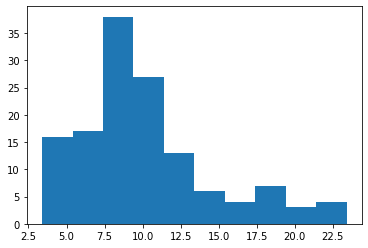

In [8]:
# Pandas Visualization Methods

import matplotlib.pyplot as plt
plt.hist(traffic['Slowness in traffic (%)'])
plt.show()

- The distribution of Slowness in traffic (%) is right skewed. 
- Most of the values pile up on the left side of the histogram.
- Most of the values are below 15.0%.

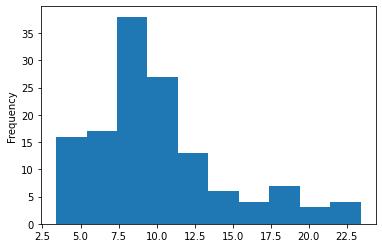

In [9]:
# Series.plot.hist() method:

traffic['Slowness in traffic (%)'].plot.hist()
plt.show()

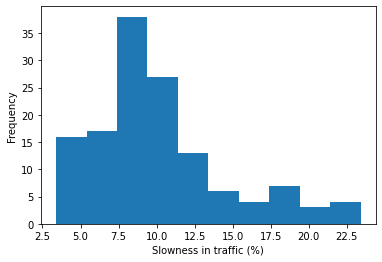

In [10]:
traffic['Slowness in traffic (%)'].plot.hist()
plt.xlabel('Slowness in traffic (%)')
plt.show()
# The y-label "Frequency" was generated by default

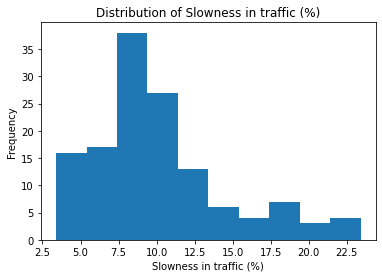

In [11]:
traffic['Slowness in traffic (%)'].plot.hist()
plt.title('Distribution of Slowness in traffic (%)')
plt.xlabel('Slowness in traffic (%)')
plt.show()

## Frequency of incidents

So far, we've examined the distribution of the Slowness in traffic (%) column. Recall that our goal here is to determine the factors that worsen the traffic slowness in São Paulo.

In [12]:
traffic['Broken Truck'].sum()

118

Let's calculate the sums for all the incident columns so we can compare them (we start with isolating the incident columns by dropping the columns 'Hour (Coded)' and 'Slowness in traffic (%)').

In [13]:
incidents = traffic.drop(['Hour (Coded)', 'Slowness in traffic (%)'],
                        axis=1)
incidents.sum()

Immobilized bus                           46
Broken Truck                             118
Vehicle excess                             4
Accident victim                           57
Running over                              16
Fire vehicles                              1
Occurrence involving freight               1
Incident involving dangerous freight       1
Lack of electricity                       16
Fire                                       1
Point of flooding                         16
Manifestations                             7
Defect in the network of trolleybuses     31
Tree on the road                           6
Semaphore off                             17
Intermittent Semaphore                     2
dtype: int64

It's not easy to compare all these numbers just by eyeballing the table that incidents.sum() returned. It's better if we use a bar plot to visualize the values.

Before we generate the bar plot, let's make the observation that incidents.sum() returns a Pandas Series:

In [14]:
type(incidents.sum())

pandas.core.series.Series

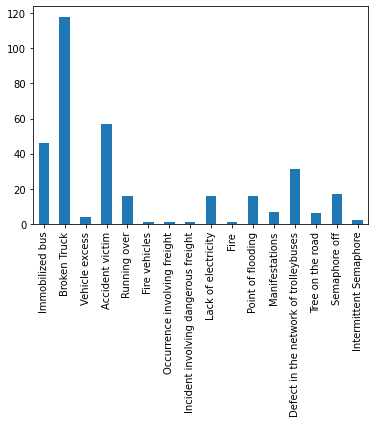

In [15]:
incidents.sum().plot.bar()
plt.show()

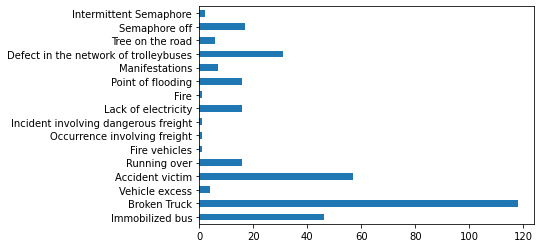

In [16]:
incidents.sum().plot.barh()
plt.show()

- The most frequent incident type is broken trucks.
- Lack of electricity and flooding are less frequent than broken trucks.


We examined the frequency of incidents by generating a bar plot — recall that we're interested in identifying factors that worsen the traffic slowness.

To get an accurate picture about each incident type and its relationship with traffic slowness, we can look up a few correlation values. The table below shows the correlation between Slowness in traffic (%) and every other column:

In [17]:
traffic.corr()['Slowness in traffic (%)']

Hour (Coded)                             0.729962
Immobilized bus                          0.101143
Broken Truck                             0.131998
Vehicle excess                          -0.045297
Accident victim                          0.121730
Running over                            -0.001133
Fire vehicles                            0.134103
Occurrence involving freight             0.026791
Incident involving dangerous freight     0.000957
Lack of electricity                      0.436569
Fire                                    -0.046737
Point of flooding                        0.420016
Manifestations                           0.066377
Defect in the network of trolleybuses   -0.147035
Tree on the road                        -0.098489
Semaphore off                            0.347242
Intermittent Semaphore                  -0.119942
Slowness in traffic (%)                  1.000000
Name: Slowness in traffic (%), dtype: float64

Leaving out the Hour (Coded) column (which doesn't describe an incident type), Slowness in traffic (%) correlates most strongly with the following:

- Lack of electricity: +0.44
- Point of flooding: +0.42
- Semaphore off: +0.34


To visualize the correlation between any two columns, we can use a scatter plot. Let's start with generating a scatter plot for Slowness in traffic (%) and Lack of electricity.

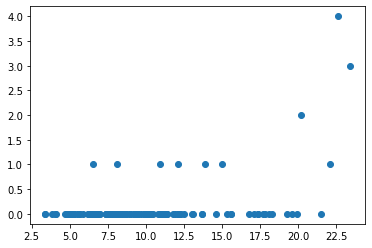

In [18]:
plt.scatter(traffic['Slowness in traffic (%)'],
            traffic['Lack of electricity'])
plt.show()

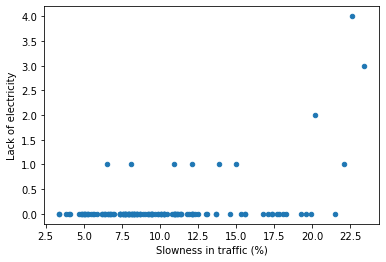

In [19]:
traffic.plot.scatter(x='Slowness in traffic (%)',
                     y='Lack of electricity')
plt.show()

The positive correlation is not very obvious on the scatter plot — although we see that when Lack of electricity increases to 2, 3 or 4, the traffic slowness percentage tends to increase as well.



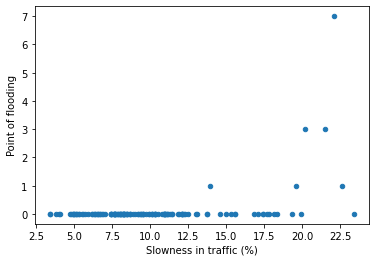

In [20]:
traffic.plot.scatter(x='Slowness in traffic (%)', y='Point of flooding')
plt.show()

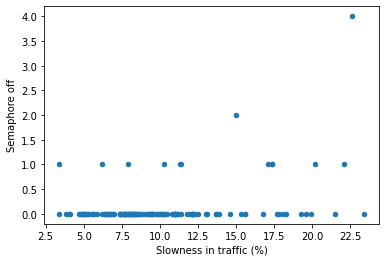

In [21]:
traffic.plot.scatter(x='Slowness in traffic (%)', y='Semaphore off')
plt.show()

## Traffic Slowness Over 20%

We looked up a few correlation values and generated three scatter plots. We identified lack of electricity, flooding, and nonfunctional semaphores as potential factors worsening the traffic.
To look for more evidence, we're going to isolate all the rows where traffic slowness is 20% or more. Then, we're going to calculate and visualize the incident frequency.

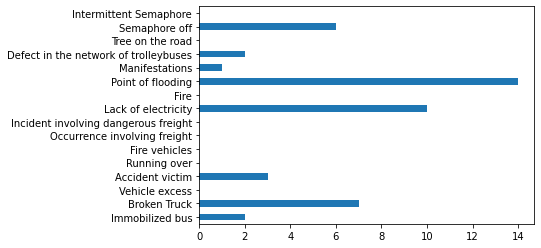

In [22]:
slowness_20_or_more = traffic[traffic['Slowness in traffic (%)'] >= 20]
slowness_20_or_more = slowness_20_or_more.drop(['Slowness in traffic (%)', 'Hour (Coded)'], axis=1)
incident_frequencies = slowness_20_or_more.sum()
incident_frequencies.plot.barh()
plt.show()

We isolated the rows where traffic slowness is higher than 20%.

One conclusion is that lack of electricity and flooding are probably two factors that are causing significant traffic problems. Nonfunctional semaphores also affect traffic, but they are probably a result of lack of electricity.

If we had to communicate our results to São Paulo's administration, we could report that lack of electricity and flooding cause significant traffic problems. This information can help in choosing which incident type to prioritize solving.

## How traffic slowness change

How traffic slowness changes over the 7:00 – 20:00 time interval.

First, we're going to isolate the data for each day — from Monday to Friday.

In [23]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
traffic_per_day = {}
for i, day in zip(range(0, 135, 27), days):
    each_day_traffic = traffic[i:i+27]
    traffic_per_day[day] = each_day_traffic

We use the zip() function above to iterate over range() and days at the same time.

The traffic_per_day variable is a Python dictionary. It contains five keys: 'Monday', 'Tuesday', 'Wednesday', 'Thursday', and 'Friday'. For each key, we have a DataFrame containing only the data for that specific day. For instance, traffic_per_day['Monday'] has only the data for Monday:

In [24]:
traffic_per_day

{'Monday':     Hour (Coded)  Immobilized bus  Broken Truck  Vehicle excess  \
 0              1                0             0               0   
 1              2                0             0               0   
 2              3                0             0               0   
 3              4                0             0               0   
 4              5                0             0               0   
 5              6                0             0               0   
 6              7                0             0               0   
 7              8                0             0               0   
 8              9                0             0               0   
 9             10                0             0               0   
 10            11                0             0               0   
 11            12                0             1               0   
 12            13                0             0               0   
 13            14                2    

In [25]:
traffic_per_day['Monday']

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.6
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.7
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.2
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.1
5,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.9
6,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.3
7,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.2
8,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.6
9,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.4


In [26]:
traffic_per_day['Monday'].head(3)

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.6
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.7


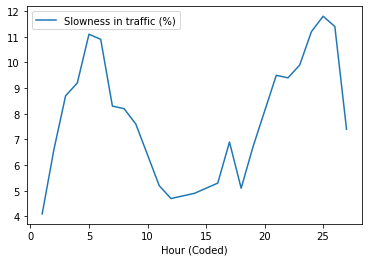

In [27]:
traffic_per_day['Monday'].plot.line(x='Hour (Coded)',
                                    y='Slowness in traffic (%)')
plt.show()

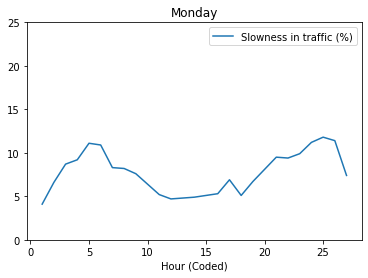

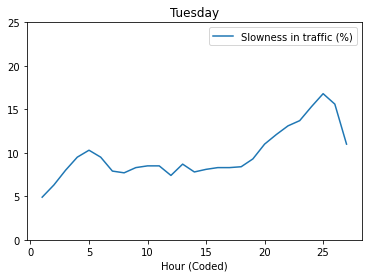

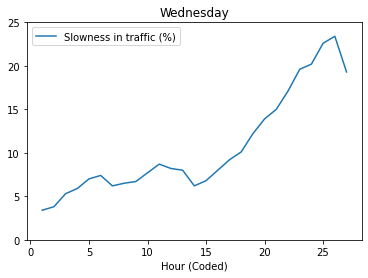

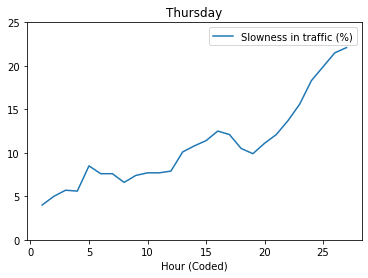

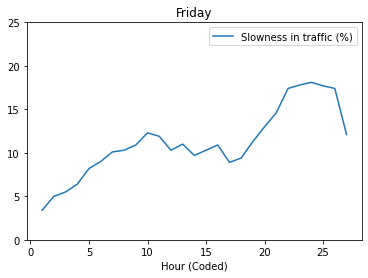

In [28]:
for day in days:
    traffic_per_day[day].plot.line(x='Hour (Coded)',
                                   y='Slowness in traffic (%)')
    plt.title(day)
    plt.ylim([0, 25])
    plt.show()

## Comparing graphs

A better choice here is to put all five line plots on the same graph.

we're going to use plt.plot() instead of the DataFrame.plot.line() method. That's because DataFrame.plot.line() plots separate graphs by default, which means we won't be able to put all the lines on the same graph.

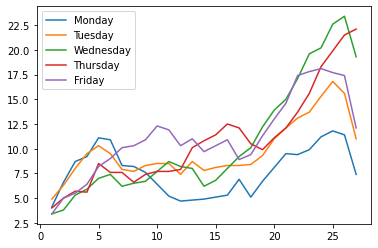

In [29]:
for day in days:
    plt.plot(traffic_per_day[day]['Hour (Coded)'], 
             traffic_per_day[day]['Slowness in traffic (%)'], label=day)
plt.legend()
plt.show()

Looking at the graph, we see the slowest traffic was on Wednesday and Thursday nights between 17:00 and 20:00. This specific time interval also registered high slowness values on Tuesday and Friday (and Monday — more or less). This is most likely the time when people are returning home from work.

## Grid charts

There are portions on the graph where there are too many lines close to each other. This is making the graph harder to read. It's also hard to follow the line of a single day because it intersects with other lines.

The best approach in this case is to plot the five line plots both collectively and separately.

In [30]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

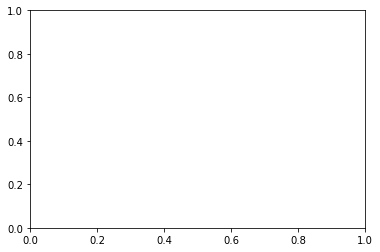

In [31]:
plt.figure()
plt.subplot()
plt.show()

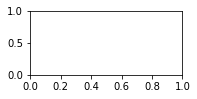

In [32]:
plt.figure()
plt.subplot(3, 2, 1)
plt.show()

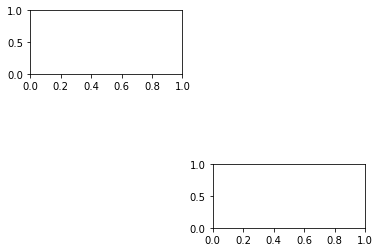

In [33]:
plt.figure()
plt.subplot(3, 2, 1)
plt.subplot(3, 2, 6) # index number 6
plt.show()

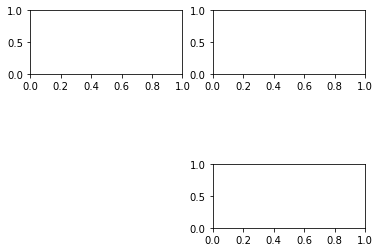

In [34]:
plt.figure()
plt.subplot(3, 2, 1)
plt.subplot(3, 2, 2)
plt.subplot(3, 2, 6)
plt.show()

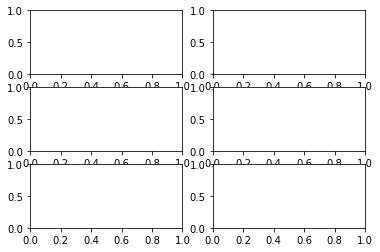

In [35]:
plt.figure()
plt.subplot(3, 2, 1)
plt.subplot(3, 2, 2)
plt.subplot(3, 2, 3)
plt.subplot(3, 2, 4)
plt.subplot(3, 2, 5)
plt.subplot(3, 2, 6)
plt.show()

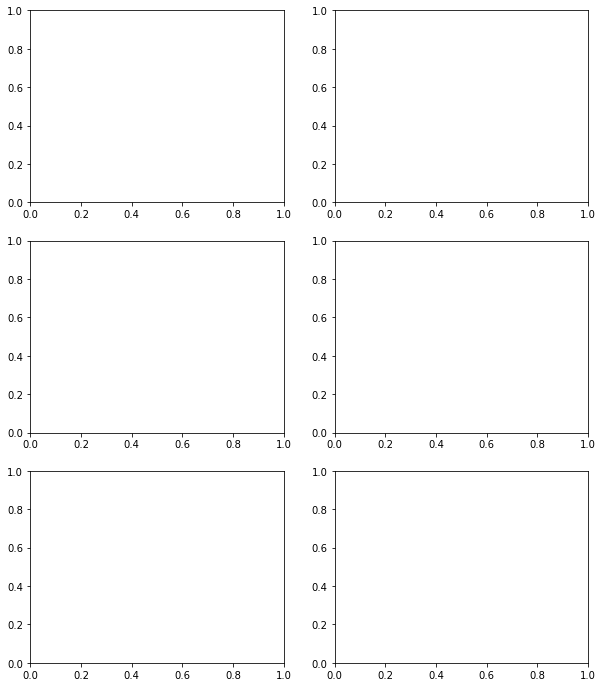

In [36]:
plt.figure(figsize=(10, 12))
plt.subplot(3, 2, 1)
plt.subplot(3, 2, 2)
plt.subplot(3, 2, 3)
plt.subplot(3, 2, 4)
plt.subplot(3, 2, 5)
plt.subplot(3, 2, 6)
plt.show()

[]

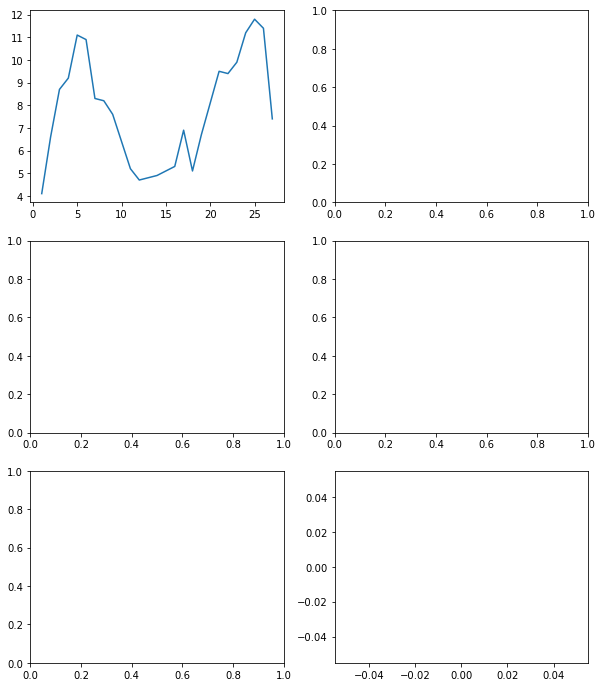

In [37]:
plt.figure(figsize=(10, 12))

# The first subplot
plt.subplot(3, 2, 1)
plt.plot(traffic_per_day['Monday']['Hour (Coded)'],
        traffic_per_day['Monday']['Slowness in traffic (%)'])

# The rest of the subplots
plt.subplot(3, 2, 2)
plt.subplot(3, 2, 3)
plt.subplot(3, 2, 4)
plt.subplot(3, 2, 5)
plt.subplot(3, 2, 6)

# plt.show() at the end to display the entire grid chart
plt.plot()

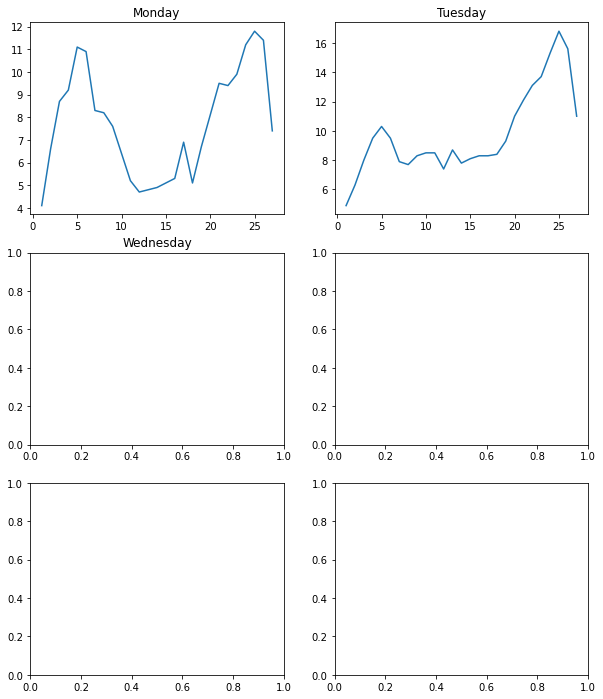

In [38]:
plt.figure(figsize=(10, 12))

# The first subplot
plt.subplot(3, 2, 1)
plt.plot(traffic_per_day['Monday']['Hour (Coded)'],
        traffic_per_day['Monday']['Slowness in traffic (%)'])
plt.title('Monday')

# The second subplot
plt.subplot(3, 2, 2)
plt.plot(traffic_per_day['Tuesday']['Hour (Coded)'],
        traffic_per_day['Tuesday']['Slowness in traffic (%)'])
plt.title('Tuesday')

# The third subplot
plt.subplot(3, 2, 3)
plt.title('Wednesday')

# The rest of the subplots
plt.subplot(3, 2, 4)
plt.subplot(3, 2, 5)
plt.subplot(3, 2, 6)

plt.show()

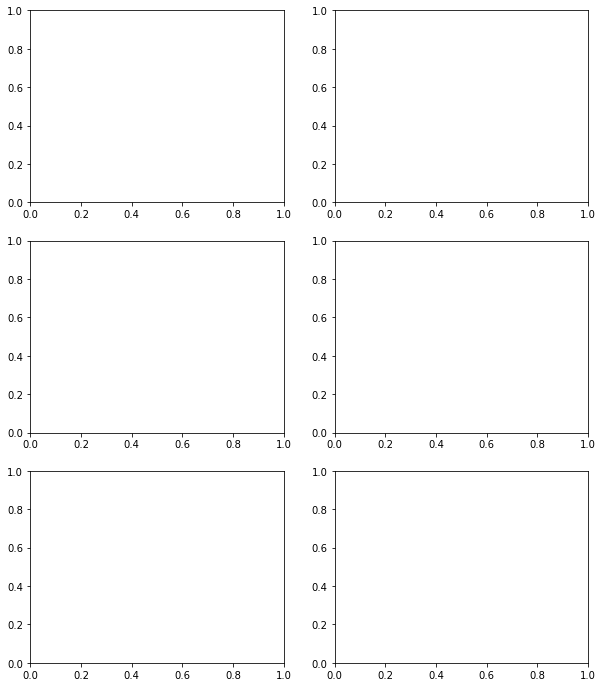

In [39]:
plt.figure(figsize=(10,12))

for i in range(1, 7):
    plt.subplot(3, 2, i)

plt.show()

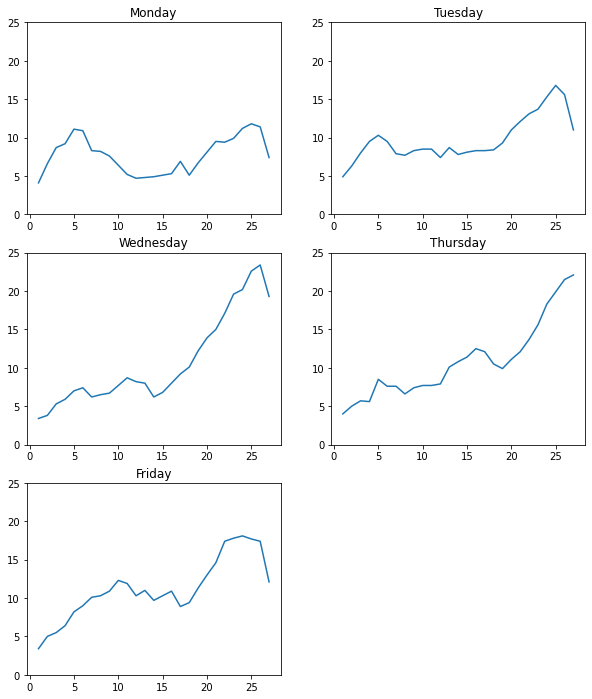

In [40]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
traffic_per_day = {}
for i, day in zip(range(0, 135, 27), days):
    each_day_traffic = traffic[i:i+27]
    traffic_per_day[day] = each_day_traffic
plt.figure(figsize=(10,12))

for i, day in zip(range(1, 6), days):
    plt.subplot(3, 2, i)
    plt.plot(traffic_per_day[day]['Hour (Coded)'],
        traffic_per_day[day]['Slowness in traffic (%)'])
    plt.title(day)
    plt.ylim([0, 25])

plt.show()

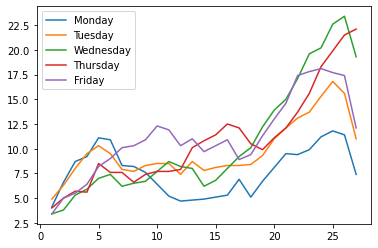

In [41]:
for day in days:
    plt.plot(traffic_per_day[day]['Hour (Coded)'],
             traffic_per_day[day]['Slowness in traffic (%)'],
             label=day)

plt.legend()
plt.show()

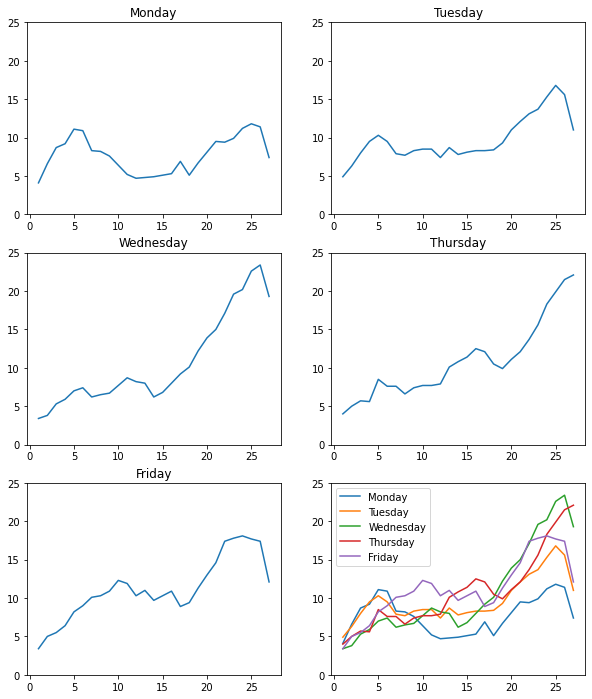

In [42]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
traffic_per_day = {}
for i, day in zip(range(0, 135, 27), days):
    each_day_traffic = traffic[i:i+27]
    traffic_per_day[day] = each_day_traffic
    
plt.figure(figsize=(10,12))

for i, day in zip(range(1,6), days):
    plt.subplot(3, 2, i)
    plt.plot(traffic_per_day[day]['Hour (Coded)'],
        traffic_per_day[day]['Slowness in traffic (%)'])
    plt.title(day)
    plt.ylim([0,25])
    
plt.subplot(3, 2, 6)
for day in days:
    plt.plot(traffic_per_day[day]['Hour (Coded)'],
             traffic_per_day[day]['Slowness in traffic (%)'],
             label=day)
    plt.ylim([0,25])
    
plt.legend()
plt.show()


Thus,

- Speed up our exploratory data visualization workflow using Pandas.
- Better compare graphs using grid charts (also called small multiples).
- Generate grid charts with Matplotlib.

Thank you!